In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [98]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [99]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', 800)

# Downloading and reading metadata:

In [127]:

url = 'https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv'
# df = pd.read_csv(url, error_bad_lines=False)
import requests

csv_url = "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv"
req = requests.get(csv_url)

url_content = req.content

csv_file = open('downloaded.csv', 'wb')

csv_file.write(url_content)

csv_file.close()
df = pd.read_csv("downloaded.csv")

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. On January 25, he received supplemental oxygen through a nasal cannula at a rate of 5 liters per minute because of increasing dyspnea with hypoxemia. The partial pressure of oxygen was 57.2 mm...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. On January 25, he received supplemental oxygen through a nasal cannula at a rate of 5 liters per minute because of increasing dyspnea with hypoxemia. The partial pressure of oxygen was 57.2 mm...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had

In [125]:
df.shape

(950, 30)

In [126]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. On January 25, he received supplemental oxygen through a nasal cannula at a rate of 5 liters per minute because of increasing dyspnea with hypoxemia. The partial pressure of oxygen was 57.2 mm...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. On January 25, he received supplemental oxygen through a nasal cannula at a rate of 5 liters per minute because of increasing dyspnea with hypoxemia. The partial pressure of oxygen was 57.2 mm...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had

In [103]:
df.dtypes

patientid                  object
offset                    float64
sex                        object
age                       float64
finding                    object
RT_PCR_positive            object
survival                   object
intubated                  object
intubation_present         object
went_icu                   object
in_icu                     object
needed_supplemental_O2     object
extubated                  object
temperature               float64
pO2_saturation            float64
leukocyte_count           float64
neutrophil_count          float64
lymphocyte_count          float64
view                       object
modality                   object
date                       object
location                   object
folder                     object
filename                   object
doi                        object
url                        object
license                    object
clinical_notes             object
other_notes                object
Unnamed: 29   

In [104]:
dfs = df.loc[df['survival'] == 'Y']
dfs.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,257.000000,192.000000,29.000000,50.000000,7.000000,14.000000,16.000000
mean,14.548638,49.885417,37.875862,82.306000,5.061429,5.460714,1.178875
std,26.218258,14.920642,0.971617,35.786045,3.131770,3.262864,0.590746
min,-10.000000,18.000000,36.000000,25.000000,2.850000,1.630000,0.400000
25%,3.000000,39.000000,37.200000,57.500000,3.005000,2.800000,0.790500
50%,7.000000,50.000000,38.000000,88.650000,3.980000,5.150000,1.100000
75%,15.000000,60.000000,38.500000,97.000000,5.695000,6.725000,1.450000
max,240.000000,84.000000,39.600000,175.000000,11.200000,11.000000,2.700000


In [105]:
dfs = df.loc[df['survival'] == 'N']
dfs.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,64.000000,50.000000,9.000000,7.000000,1.00,2.000000,2.000000
mean,6.562500,63.380000,38.533333,104.000000,0.22,12.450000,0.950000
std,6.596957,17.308592,0.772981,106.287346,NaN,0.636396,0.070711
min,-7.000000,21.000000,37.500000,40.000000,0.22,12.000000,0.900000
25%,2.750000,45.500000,38.000000,45.000000,0.22,12.225000,0.925000
50%,6.000000,72.000000,38.300000,85.000000,0.22,12.450000,0.950000
75%,9.000000,78.000000,39.000000,86.500000,0.22,12.675000,0.975000
max,35.000000,94.000000,40.000000,340.000000,0.22,12.900000,1.000000


In [106]:
# Dropping duplicate patients for count
df['patientid'].nunique()

472

In [107]:
df1 = df.drop_duplicates(subset=['patientid'])

In [108]:
df1.shape

(472, 30)

<AxesSubplot:>

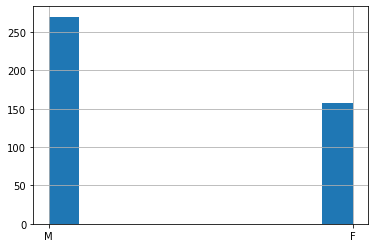

In [109]:
df1.sex.hist()

<AxesSubplot:>

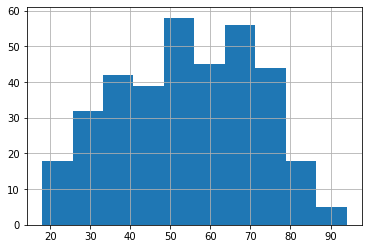

In [110]:
df1.age.hist()

In [111]:
df1.view.value_counts()

PA           224
AP           124
AP Supine     98
Axial         23
L              2
AP Erect       1
Name: view, dtype: int64

<AxesSubplot:>

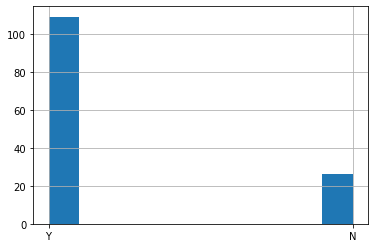

In [112]:
df1.survival.hist()

In [113]:
df1['finding'].value_counts()

Pneumonia/Viral/COVID-19                   307
Pneumonia                                   39
todo                                        25
Pneumonia/Fungal/Pneumocystis               17
No Finding                                  17
Tuberculosis                                10
Pneumonia/Bacterial/Streptococcus            9
Pneumonia/Viral/SARS                         8
Pneumonia/Bacterial/Legionella               6
Pneumonia/Lipoid                             6
Pneumonia/Bacterial/Klebsiella               5
Pneumonia/Viral/MERS-CoV                     4
Pneumonia/Viral/Influenza                    3
Pneumonia/Bacterial/Mycoplasma               3
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Viral/Varicella                    2
Pneumonia/Bacterial/Nocardia                 1
Pneumonia/Viral/Influenza/H1N1               1
Pneumonia/Bacterial                          1
Pneumonia/Viral/Herpes                       1
Unknown                                      1
Pneumonia/Bac

In [211]:
dfcov = df1['finding'] == 'Pneumonia/Viral/COVID-19'
dfc = df1[dfcov]
covidp_images = list(dfc.filename)
len(covidp_images)
covidp_img = ["Covid"+x for x in covidp_images]

In [114]:
# df1.groupby(['offset', 'survival'].size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,6)))

In [128]:
df1.corr()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
offset,1.000000,0.051915,0.084707,0.264977,-0.156749,0.233237,0.068481
age,0.051915,1.000000,0.192259,-0.131494,0.492587,0.596002,0.653533
temperature,0.084707,0.192259,1.000000,-0.275499,0.119528,0.575253,-0.373459
pO2_saturation,0.264977,-0.131494,-0.275499,1.000000,-0.844946,0.079521,0.483623
leukocyte_count,-0.156749,0.492587,0.119528,-0.844946,1.000000,0.994478,-0.061150
neutrophil_count,0.233237,0.596002,0.575253,0.079521,0.994478,1.000000,0.130692
lymphocyte_count,0.068481,0.653533,-0.373459,0.483623,-0.061150,0.130692,1.000000


In [115]:
# Plotting with legends
import seaborn as sns


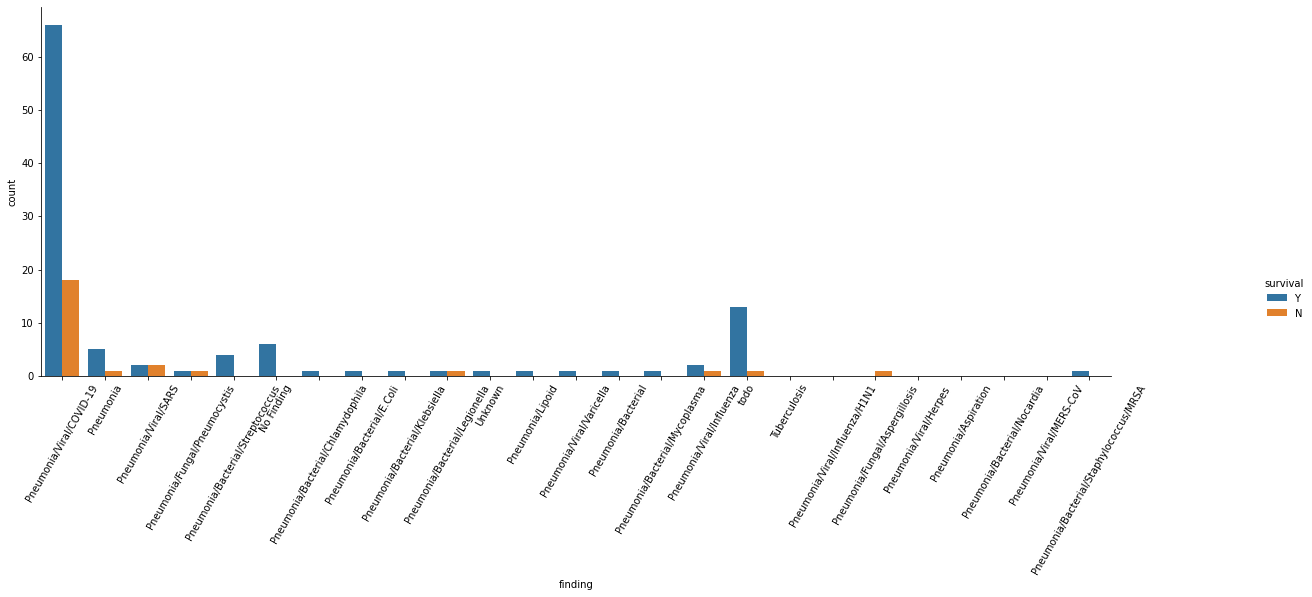

In [117]:
bar = sns.catplot(x = 'finding', kind = 'count', hue= 'survival', data = df1)
plt.gcf().set_size_inches(22, 6)
bar.set_xticklabels(rotation = 60)

# Constructing the Classifier - kNN/SVM

Preprocessing: Filling  Nan

In [118]:
for i in list(df1.columns):
    print(i, df1[i].isnull().sum())
# Leukocyte, neutrophil, lymphocyte, need supplemental, pO2 saturation have very less values

patientid 0
offset 153
sex 44
age 115
finding 0
RT_PCR_positive 157
survival 337
intubated 374
intubation_present 375
went_icu 311
in_icu 347
needed_supplemental_O2 438
extubated 460
temperature 407
pO2_saturation 387
leukocyte_count 456
neutrophil_count 455
lymphocyte_count 446
view 0
modality 0
date 132
location 33
folder 0
filename 0
doi 285
url 0
license 147
clinical_notes 85
other_notes 236
Unnamed: 29 470


In [119]:
df1['survival'].value_counts()

Y    109
N     26
Name: survival, dtype: int64

In [120]:
df1['survival'].notna().sum()

135

In [121]:
dfn = df1.dropna(subset=['survival'])
dfn.shape

(135, 30)

Preprocessing: Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# for cat in ['']
dfn['survival'] = class_le.fit_transform(dfn['survival'].astype(str))
dfn['RT_PCR_positive'] = class_le.fit_transform(dfn['RT_PCR_positive'].astype(str))
dfn['intubated'] = class_le.fit_transform(dfn['intubated'].astype(str))
dfn['intubation_present'] = class_le.fit_transform(dfn['intubation_present'].astype(str))
dfn['went_icu'] = class_le.fit_transform(dfn['went_icu'].astype(str))
dfn['in_icu'] = class_le.fit_transform(dfn['in_icu'].astype(str))
dfn['needed_supplemental_O2'] = class_le.fit_transform(dfn['needed_supplemental_O2'].astype(str))
dfn['extubated'] = class_le.fit_transform(dfn['extubated'].astype(str))

C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [130]:
dfn.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,1,1,0,0,0,0,1,2,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung",NaN,NaN
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,2,0,2,2,2,2,2,2,38.0,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed symptoms 4 days after exposure. Initial anteroposterior chest radiograph shows bilateral airspace disease that is more extensive in the left lung.,NaN,NaN
12,7,7.0,F,29.0,Pneumonia/Viral/SARS,2,1,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,"SARS in a 29-year-old woman who presented 7 days after exposure. (a) Posteroanterior radiograph depicts a subtle focus of consolidation in the right lower zone, partly obscured by breast tissue.",NaN,NaN
17,10,19.0,F,73.0,Pneumonia/Viral/SARS,2,0,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 73-year-old woman who presented 17 days after exposure. The chest radiograph obtained on admission (not shown) was normal. (a) Anteroposterior radiograph obtained 2 days after admission shows focal consolidation in the right lung. (b) Anteroposterior radiograph obtained 8 days later shows bilateral multifocal consolidation. (c) Anteroposterior radiograph obtained 8 days later shows diffuse airspace disease. The patient died 36 days after exposure to SARS.,NaN,NaN
20,11,0.0,M,56.0,Pneumonia/Viral/COVID-19,1,1,2,2,2,2,2,2,38.6,97.0,7.4,NaN,NaN,PA,X-ray,2020,"Sunnybrook Health Sciences Centre, Toronto, Ontario, Canada",images,1-s2.0-S0140673620303706-fx1_lrg.jpg,10.1016/S0140-6736(20)30370-6,https://www.sciencedirect.com/science/article/pii/S0140673620303706,NaN,"A 56-year-old man presented to our Emergency Department in Toronto, ON, Canada, with fever and non-productive cough, 1 day after returning from a 3-month visit to Wuhan, China. Given this travel history, the transferring ambulance and receiving hospital personnel used appropriate personal protective equipment. He had a medical history of well controlled hypertension. On examination, his maximum temperature was 38·6°C, oxygen saturation was 97% on room air, and respiratory rate was 22 breaths per min—without any signs of respiratory distress. Laboratory investigations showed mild thrombocytopenia (113 × 109 per L, normal 150–400), haemoglobin concentration 146 g/L (normal 130–180

In [131]:
df.corr()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
offset,1.000000,-0.001992,0.085304,0.164643,-0.156749,0.148430,-0.009622
age,-0.001992,1.000000,0.176245,-0.174707,0.492587,0.596002,0.528551
temperature,0.085304,0.176245,1.000000,-0.224417,0.119528,0.575253,-0.342545
pO2_saturation,0.164643,-0.174707,-0.224417,1.000000,-0.844946,0.226702,0.263767
leukocyte_count,-0.156749,0.492587,0.119528,-0.844946,1.000000,0.994478,-0.061150
neutrophil_count,0.148430,0.596002,0.575253,0.226702,0.994478,1.000000,0.039701
lymphocyte_count,-0.009622,0.528551,-0.342545,0.263767,-0.061150,0.039701,1.000000


In [132]:
cols = list(df.columns.values)
cols.pop(cols.index('survival')) 
df = df[cols+['survival']] 
#Create new dataframe with Survival as last column

Supervised learning split the target value

In [137]:
X = dfn.iloc[:, 0 :20].values #eliminating all image related columns in metadata
y = dfn.iloc[:, -1].values
X.shape

(135, 20)

Feature Selection based on Survival

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=10)
# fit = test.fit(X, y)
# summarize scores

print(fit.scores_)
# features = fit.transform(X)
# summarize selected features
# print(features[0:11,:])
# X_n = SelectKBest(chi2, k=5).fit_transform(X, y)
# X_n

NameError: name 'fit' is not defined

In [23]:
# Train, test, validation split


# Constructing the CNN for the images:

In [22]:
import os
import random
import cv2
%matplotlib inline
import tensorflow as tf
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

In [210]:
# Moving images into separate folders

import re
import glob
import shutil
direc = r"C:/Users/Public/Documents/Anaconda3/Projects/covid-chestxray-dataset-master/images/"
Cov = direc+ "Covid"
Noncov = direc +"NonCovid"
listdirs = os.listdir(direc)

for file in listdirs:
    if re.match(r"^Covid", file):
#         if file in covidp_images:
        shutil.copy(direc+file, Cov)
    else:
        shutil.copy(direc+file, Noncov)

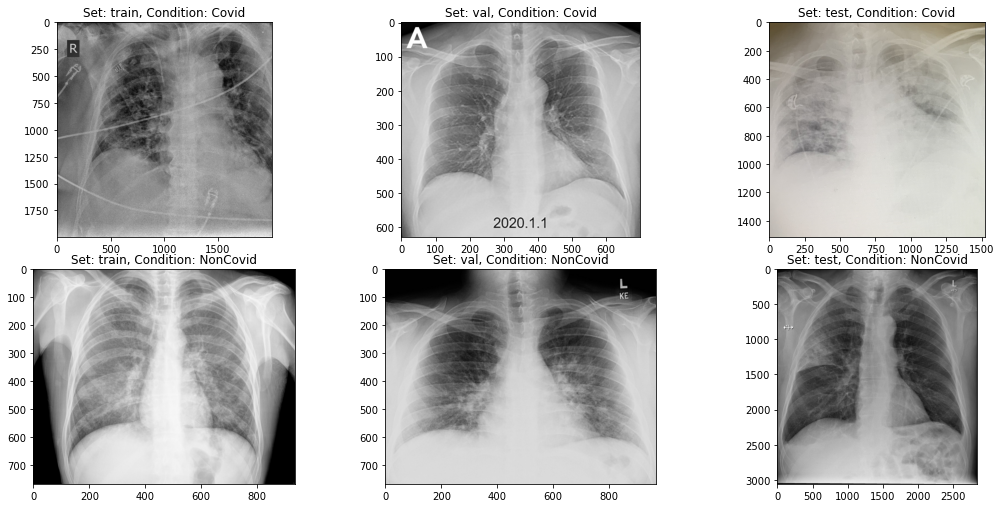

In [259]:
input_path = direc
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Covid/'+os.listdir(set_path+'/Covid')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Covid'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/NonCovid/'+os.listdir(set_path+'/NonCovid')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: NonCovid'.format(_set))

In [223]:
# val_ratio = 0.15
# test_ratio = 0.05
# allFileNames = os.listdir(Cov)
# np.random.shuffle(allFileNames)
# train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                           [int(len(allFileNames)* (1 - val_ratio + test_ratio)), 
#                                                            int(len(allFileNames)* (1 - test_ratio))])


# train_FileNames = [Cov+'/'+ file for file in train_FileNames.tolist()]
# val_FileNames = [Cov+'/' + file for file in val_FileNames.tolist()]
# test_FileNames = [Cov+'/' + file for file in test_FileNames.tolist()]
# print('Total images: ', len(allFileNames))
# print('Training: ', len(train_FileNames))
# print('Validation: ', len(val_FileNames))
# print('Testing: ', len(test_FileNames))

# # Copy-pasting images
# for file in train_FileNames:
#     shutil.copy(file, Cov +'/train' )

# for file in val_FileNames:
#     shutil.copy(file, Cov +'/val' )

# for file in test_FileNames:
#     shutil.copy(file, Cov +'/test')

In [222]:
# import split_folders
# split_folders.ratio(Cov, output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [243]:
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(direc + _set + '/Covid'))
    n_infect = len(os.listdir(direc + _set + '/NonCovid'))
    print('Set: {}, Covid images: {}, NonCovid images: {}'.format(_set, n_normal, n_infect))

Set: train, Covid images: 202, NonCovid images: 512
Set: val, Covid images: 15, NonCovid images: 96
Set: test, Covid images: 16, NonCovid images: 32


In [307]:
def process_data(img_dims, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
#     train_gen = flow_from_dataframe(
#     dataframe= traindf,
#     directory= direc+"./train/",
#     batch_size=32,
#     seed=42,
#     shuffle=True,
#     target_size=(img_dims, img_dims))
    train_gen = train_datagen.flow_from_directory(
    directory=direc+'train', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)

    test_gen = test_val_datagen.flow_from_directory(
    directory=direc+'test', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)
    
    # I will be making predictions off of the test set in one batch size
    # This is useful to be able to get the confusion matrix
    test_data = []
    test_labels = []
    label = 0
    target_input = (150, 150, 3)
    for cond in ['\\Covid\\', '\\NonCovid\\']:
        for img in (os.listdir(direc + '\\test' + cond)):
            img = plt.imread(direc+'\\test'+cond+img, 0)
# #             img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#             img = cv2.resize(img, (img_dims, img_dims))
#             img = np.dstack([img, img, img])
#             img = img.astype('float32') / 255
#             print(img.shape)
            if cond=='/Covid/':
                label = 0
            elif cond=='/NonCovid/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    return train_gen, test_gen, test_data, test_labels

In [308]:
img_dims = 150
epochs = 10
batch_size = 32

train_gen, test_gen, test_data, test_labels = process_data(img_dims, batch_size)

Found 714 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [309]:
inputs = Input(shape=(img_dims, img_dims, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [310]:
hist = model.fit_generator(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
22/22 [==============================] - 34s 2s/step - loss: 0.6250 - accuracy: 0.7199 - val_loss: 0.6462 - val_accuracy: 0.6562
Epoch 2/10
22/22 [==============================] - 28s 1s/step - loss: 0.5998 - accuracy: 0.7155 - val_loss: 0.7003 - val_accuracy: 0.5938
Epoch 3/10
22/22 [==============================] - 30s 1s/step - loss: 0.6094 - accuracy: 0.7155 - val_loss: 0.6664 - val_accuracy: 0.6250
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.7185
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
22/22 [==============================] - 29s 1s/step - loss: 0.6044 - accuracy: 0.7185 - val_loss: 0.6442 - val_accuracy: 0.6562
Epoch 5/10
22/22 [==============================] - 28s 1s/step - loss: 0.5842 - accuracy: 0.7214 - val_loss: 0.6215 - val_accuracy: 0.7188
Epoch 6/10
22/22 [==============================] - ETA: 0s -

KeyError: 'acc'

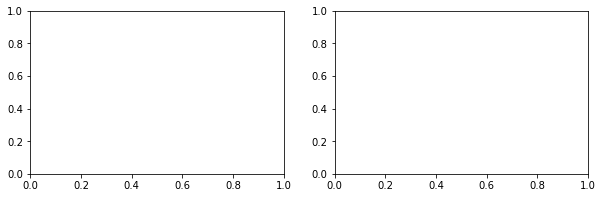

In [311]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [313]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_data = np.array(test_data)
preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['acc'][-1])*100, 2)))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).